In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords
import numpy as np
import json




In [2]:
testo=input("inserisci file ")
if ".json" in testo:
    file=open("LordOfTheRingsBook.json",encoding="utf-8")
    data=json.load(file)
    l=[]
    for x in data:
        x.pop("BookName")
        x.pop("ChapterName")
        l.append(x["ChapterData"])

    s=" ".join(l)

    d={"text":[s]}
    d1=pd.DataFrame(d)
else:
    db=pd.read_csv("war", sep='\t')
    db.columns=["text"]
    l=[]
    for x in db["text"]:
        l.append(x)
    s=" ".join(l)
    d1=pd.DataFrame({"text":[s]})

d1

,text
0,"“Well, Prince, so Genoa and Lucca are now just..."


In [3]:

def tokenization(db):                            #rimozione punteggiatura e tokenizzazione
    db=db.reset_index()
    db.columns=["index","text"]
    sw=set(stopwords.words("english"))
    punt=[",",".",":",";","'","!","?"]


    def f(x):
        x1=x
        for y in x:
            if y in punt:
                x1=x1.replace(y,"")
        return x1
            
    db["text2"]=db["text"].apply(f)
    db["token"]=db["text2"].apply(lambda x: word_tokenize(x))
    def f(x):
        l=[]
        for y in x:
            if not y.lower() in sw:
                l.append(y)
        return l
    db["token"]=db["token"].apply(f)
    return db

d1=tokenization(d1)
d1

,index,text,text2,token
0,0,"“Well, Prince, so Genoa and Lucca are now just...",“Well Prince so Genoa and Lucca are now just f...,"[“, Well, Prince, Genoa, Lucca, family, estate..."


In [4]:
def main_character(d1):
    def f(x):                                                      #conto frequenza parole per identificare i personaggi principali
        mf=FreqDist(x)
        return mf
    d1["mfc"]=d1["token"].apply(f)

    def f(x):                                                            # ordino la nuova colonna per i termini più frequenti
        l=[y for y in x.items() if y[0][0].isupper()]
        l.sort(key=lambda z: z[1],reverse=True)

        d3=dict(l)
        return d3
    d1["mfc"]=d1["mfc"].apply(f)
    return d1

d1=main_character(d1)
main=[]
for x in d1["mfc"]:
    for y,z in enumerate(x):
        if y<=15:
            main.append(z)
print(f"The main characters are {main}")


The main characters are ['Pierre', 'Prince', 'Natásha', 'Andrew', 'French', 'Rostóv', 'Moscow', 'Mary', 'Nicholas', 'Emperor', 'Princess', 'Napoleon', 'Kutúzov', 'Russian', 'Sónya', 'Denísov']


In [5]:
from afinn import Afinn                                  #Creating afinn
afin1=Afinn(language="en")
from afinn import Afinn
afin1=Afinn(language="en")

n=pd.read_excel("n.xlsx",header=None)
p=pd.read_excel("p.xlsx",header=None)
nd={x:-2 for x in n[0]}
pd1={x:2 for x in p[0]}
for word,score in nd.items():
    afin1._dict[word]=score
for word,score in pd1.items():
    afin1._dict[word]=score

In [6]:
for x in d1["token"]:                # creo un nuovo df con i token dividendolo in 3 parti uguali per valutare il sentiment nel tempo
    lunghezza=len(x)
div3=int(lunghezza/3)
d2={"tx":[" ".join([x for y in d1["token"] for z,x in enumerate(y) if z<=div3])," ".join([x for y in d1["token"] for z,x in enumerate(y) if z>div3 and z<=div3*2])," ".join([x for y in d1["token"] for z,x in enumerate(y) if z>div3*2])]}
d2=pd.DataFrame(d2)
d2["sentiment"]=d2["tx"].apply(lambda x: afin1.score(x))
d2

,tx,sentiment
0,“ Well Prince Genoa Lucca family estates Buona...,2979.0
1,commissioner affair passed headquarters ’ go c...,1997.0
2,French right Murat ’ troops advanced Borodinó ...,162.0


In [7]:

name=input("digit the name of a character ").capitalize()                 # scelgo il personaggio da analizzare e valuto a che sentiment è associato e a quali personaggi è legato
l=[]
for x in d1["token"]:
    for y,z in enumerate(x):
        if z==name:
            for a in range(y-7,y+7):
                l.append(x[a])
s1=" ".join(l)
print(f"The sentiment connected to {name} is {afin1.score(s1)}")






The sentiment connected to Pierre is 749.0


In [8]:
diz={}
for x in s1.split():
    if x in main and x!=name:
        if not x in diz:
            diz[x]=1
        else:
            diz[x]+=1
l=[x for x  in diz.items()]
l.sort(key=lambda x:x[1],reverse=True)
print(f"{name} has most contacts with {dict(l)}")


Pierre has most contacts with {'Prince': 157, 'Andrew': 120, 'Natásha': 96, 'Mary': 59, 'French': 57, 'Moscow': 54, 'Princess': 47, 'Nicholas': 35, 'Emperor': 28, 'Rostóv': 18, 'Russian': 17, 'Kutúzov': 17, 'Denísov': 10, 'Sónya': 10, 'Napoleon': 7}


In [9]:
d={}
for b in main:
    l1=[]
    for x in d1["token"]:
        for y,z in enumerate(x):
            if z==b:
                for a in range(y-7,y+7):
                    try:
                        l1.append(x[a])
                    except:
                        pass
    s=" ".join(l1)
    score=afin1.score(s)
    d[b]=[score]
    # print(f"the sentiment associated with {b} is {score}")
d=pd.DataFrame(d).T.reset_index()

    

The main characters are ['Pierre', 'Prince', 'Natásha', 'Andrew', 'French', 'Rostóv', 'Moscow', 'Mary', 'Nicholas', 'Emperor', 'Princess', 'Napoleon', 'Kutúzov', 'Russian', 'Sónya', 'Denísov']
Pierre has most contacts with {'Prince': 157, 'Andrew': 120, 'Natásha': 96, 'Mary': 59, 'French': 57, 'Moscow': 54, 'Princess': 47, 'Nicholas': 35, 'Emperor': 28, 'Rostóv': 18, 'Russian': 17, 'Kutúzov': 17, 'Denísov': 10, 'Sónya': 10, 'Napoleon': 7}
The sentiment connected to Pierre is 749.0


Text(0.5, 1.0, 'sentiment of the book')

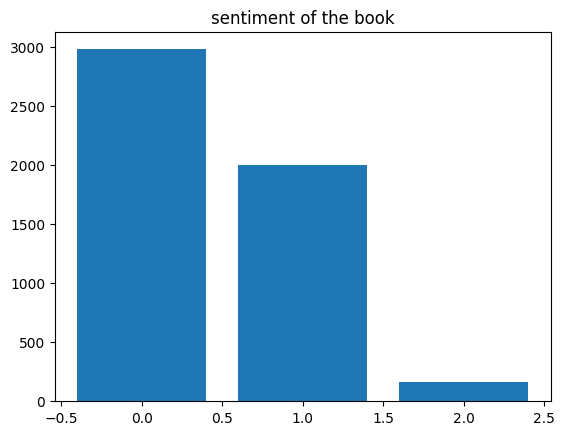

In [10]:
print(f"The main characters are {main}")
print(f"{name} has most contacts with {dict(l)}")
print(f"The sentiment connected to {name} is {afin1.score(s1)}")
plt.bar(d2.index,d2["sentiment"]);
plt.title("sentiment of the book")

Text(0.5, 1.0, 'Pierre has most contacts with...')

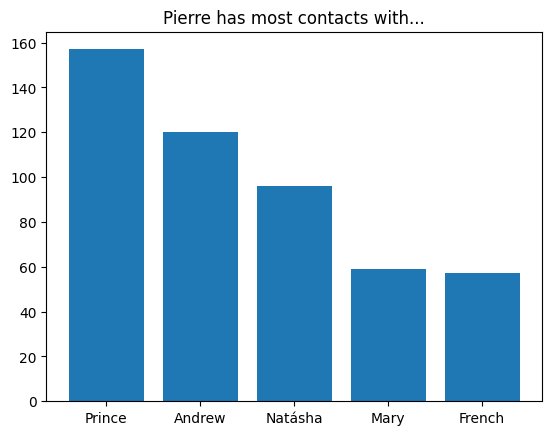

In [11]:
d3=dict(l[:5])
dc={}
for x in d3:
    dc[x]=[d3[x]]
dc=pd.DataFrame(dc).T.reset_index()

plt.bar(dc["index"],dc[0])
plt.title(f"{name} has most contacts with...")



Text(0.5, 1.0, 'sentiment associated to main characters')

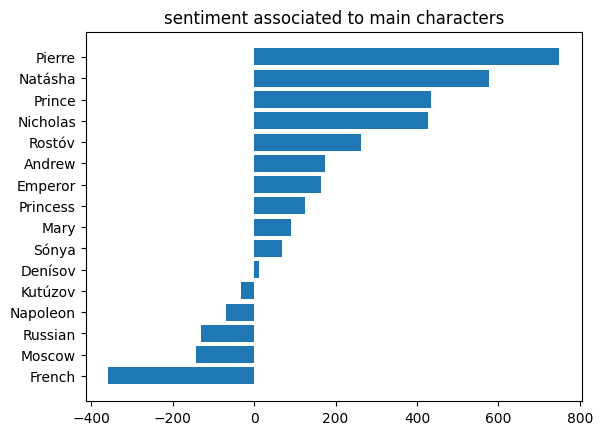

In [12]:
d=d.sort_values(by=0)
plt.barh(d["index"],d[0])
plt.title("sentiment associated to main characters")

In [13]:

def f(x):                                                # valutare anche sentiment 
    d={}
    l=[]
    x1=x.split()
    for y,z in enumerate(x1):
        if z==name:
            for a in range(y-7,y+7):
                if x1[a]!=name:
                    l.append(x1[a])
    for b in l:
        if b[0].isupper():
            if b in d:
                d[b]+=1
            else:
                d[b]=1
    l1=[x for x in d.items()]
    l1.sort(key=lambda x: x[1],reverse=True)
    d3={}
    for x in l1[:3]:
        d3[x[0]]=[x[1]]
    return pd.DataFrame(d3)

d2["name"]=d2["tx"].apply(f)



print(d2)
            

# d2

                                                  tx  sentiment  \
0  “ Well Prince Genoa Lucca family estates Buona...     2979.0   
1  commissioner affair passed headquarters ’ go c...     1997.0   
2  French right Murat ’ troops advanced Borodinó ...      162.0   

                                                name  
0       Prince  Andrew  Anna
0      99      66    53  
1     Andrew  Prince  Natásha
0      49      48  ...  
2     Natásha  Mary  French
0       58    44      41  


In [14]:
def f(x):
    count=0
    for y in x.split():
        if y==name:
            count+=1
    return count
d2["numcit"]=d2["tx"].apply(f)
d2.insert(1,"part",[f"part{x}" for x in range(1,4)])
d2

,tx,part,sentiment,name,numcit
0,“ Well Prince Genoa Lucca family estates Buona...,part1,2979.0,Prince Andrew Anna 0 99 66 53,653
1,commissioner affair passed headquarters ’ go c...,part2,1997.0,Andrew Prince Natásha 0 49 48 ...,529
2,French right Murat ’ troops advanced Borodinó ...,part3,162.0,Natásha Mary French 0 58 44 41,769


In [15]:
def f(y):                                              # sentiment associato a name nelle diverse parti del racconto
    l=[]
    for z,x in enumerate(y.split()):
        if x==name:
            for a in range(z-7,z+7):
                l.append(y.split()[a])
    return afin1.score(" ".join(l))
d2["sentassociated"]=d2["tx"].apply(f)

In [16]:
d2

,tx,part,sentiment,name,numcit,sentassociated
0,“ Well Prince Genoa Lucca family estates Buona...,part1,2979.0,Prince Andrew Anna 0 99 66 53,653,379.0
1,commissioner affair passed headquarters ’ go c...,part2,1997.0,Andrew Prince Natásha 0 49 48 ...,529,139.0
2,French right Murat ’ troops advanced Borodinó ...,part3,162.0,Natásha Mary French 0 58 44 41,769,231.0


<Figure size 4000x3000 with 0 Axes>

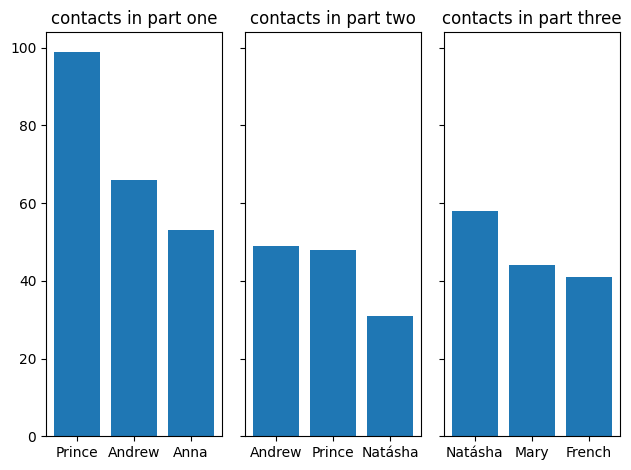

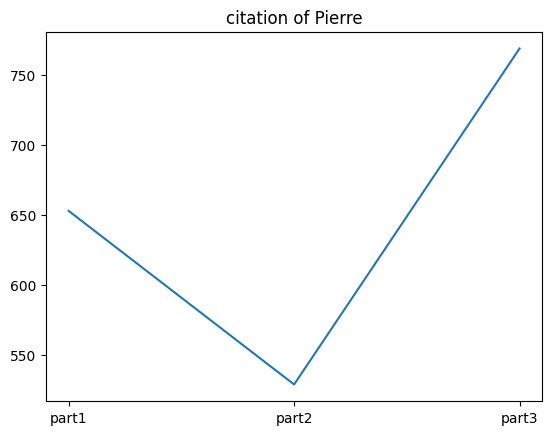

<Figure size 4000x3000 with 0 Axes>

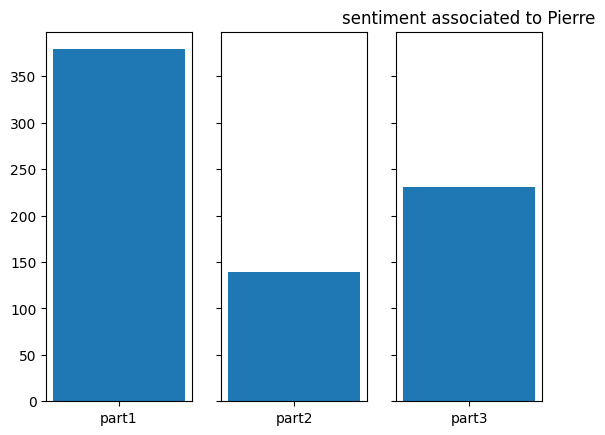

    index   0
0  Prince  99
1  Andrew  66
2    Anna  53


<Figure size 640x480 with 0 Axes>

In [23]:
d5=d2.loc[0]["name"].T.reset_index()                          # rappresento i tre personaggi con cui il name interagisce di più nelle tre parti
d6=d2.loc[1]["name"].T.reset_index()
d7=d2.loc[2]["name"].T.reset_index()


plt.figure(figsize=(40,30))
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,sharey=True)

ax1.bar(d5["index"],d5[0])
ax2.bar(d6["index"],d6[0])
ax3.bar(d7["index"],d7[0])
ax1.set_title("contacts in part one")
ax2.set_title("contacts in part two")
ax3.set_title("contacts in part three")
plt.tight_layout()
plt.show()

plt.plot(d2["part"],d2["numcit"])
plt.title(f"citation of {name}")
plt.show()


plt.figure(figsize=(40,30))
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,sharey=True)
for x,y in zip([0,1,2],[ax1,ax2,ax3]):
    db=d2.iloc[x,:]
    y.bar(db["part"],db["sentassociated"])
plt.title(f"sentiment associated to {name}")
plt.show()
plt.tight_layout()



    

print(d5)